In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

import datetime as datetime
import matplotlib.dates as dates
import matplotlib.pyplot as plt

from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import datetime
from datetime import date

In [2]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")
df.head(10)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0,1.0
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,0.0,1.0
6,3/3/2020,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,NaN,NaN
7,3/3/2020,ID-RI,Riau,0,0,0,0,2,0,3,...,0.511648,0.00,0.33,0.00,0.00,0.00,0.00%,150.00%,0.0,1.0
8,3/4/2020,ID-JK,DKI Jakarta,2,0,0,2,45,20,41,...,-6.204699,0.18,4.15,0.00,1.84,0.18,44.44%,91.11%,1.0,1.0
9,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,...,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.0,1.0


In [3]:
# menghapus kolom dengan semua data bernilai null dan kolom yang tidak diperlukan
data = df.drop(['City or Regency','Location ISO Code',
                'Province','Country','Continent','Island','Time Zone','Special Status',
                'Total Regencies','Total Cities','Total Districts','Total Urban Villages',
                'Total Rural Villages','New Cases per Million','Total Cases per Million',
                'New Deaths per Million','Total Deaths per Million','Case Fatality Rate',
                'Case Recovered Rate','Growth Factor of New Cases','Growth Factor of New Deaths'],axis = 1)
data = data.fillna(0)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
0,3/1/2020,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
1,3/2/2020,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,664,10846145,16334.31,106.836118,-6.204699,0.18
2,3/2/2020,Indonesia,2,0,0,2,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
3,3/2/2020,Riau,1,0,0,1,2,0,3,-1,Province,87024,6074100,69.80,101.805109,0.511648,0.00
4,3/3/2020,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,664,10846145,16334.31,106.836118,-6.204699,0.18


In [4]:
# Merubah format tanggal
date2=[]
for item in df['Date']:
    item2=item.split('/')
    month=int(item2[0])
    day=int(item2[1])
    year=int(item2[2])
    date2+=[datetime.date(year,month,day)]
df['Date']=date2
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
data.tail()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21754,12/2/2021,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,13892,2641884,190.17,124.521240,1.259638,39.97
21755,12/2/2021,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,42013,5519245,131.37,100.465062,-0.850253,38.99
21756,12/2/2021,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,91592,8217551,89.72,104.169465,-3.216212,37.37
21757,12/2/2021,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,72981,14874889,203.82,99.051964,2.191894,19.42
21758,12/3/2021,Indonesia,245,8,328,-91,4257243,143858,4105680,7705,Country,1916907,265185520,138.34,113.921327,-0.789275,54.25


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    21759 non-null  object 
 1   Location                21759 non-null  object 
 2   New Cases               21759 non-null  int64  
 3   New Deaths              21759 non-null  int64  
 4   New Recovered           21759 non-null  int64  
 5   New Active Cases        21759 non-null  int64  
 6   Total Cases             21759 non-null  int64  
 7   Total Deaths            21759 non-null  int64  
 8   Total Recovered         21759 non-null  int64  
 9   Total Active Cases      21759 non-null  int64  
 10  Location Level          21759 non-null  object 
 11  Area (km2)              21759 non-null  int64  
 12  Population              21759 non-null  int64  
 13  Population Density      21759 non-null  float64
 14  Longitude               21759 non-null

In [7]:
#Memanggil data untuk level provinsi
data1 = data[data['Location Level'] != 'Country']
data1.tail()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21753,12/2/2021,Sulawesi Tenggara,3,0,0,3,20160,527,19583,50,Province,38068,2635461,69.23,122.070311,-4.124689,20.00
21754,12/2/2021,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,13892,2641884,190.17,124.521240,1.259638,39.97
21755,12/2/2021,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,42013,5519245,131.37,100.465062,-0.850253,38.99
21756,12/2/2021,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,91592,8217551,89.72,104.169465,-3.216212,37.37
21757,12/2/2021,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,72981,14874889,203.82,99.051964,2.191894,19.42


In [8]:
#keep last karena yang terakhir data terupdate
newest = data1.drop_duplicates(subset='Location', keep="last")
newest.tail()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21753,12/2/2021,Sulawesi Tenggara,3,0,0,3,20160,527,19583,50,Province,38068,2635461,69.23,122.070311,-4.124689,20.00
21754,12/2/2021,Sulawesi Utara,2,0,0,2,34715,1056,33566,93,Province,13892,2641884,190.17,124.521240,1.259638,39.97
21755,12/2/2021,Sumatera Barat,4,0,0,4,89849,2152,87605,92,Province,42013,5519245,131.37,100.465062,-0.850253,38.99
21756,12/2/2021,Sumatera Selatan,4,0,0,4,59937,3071,56830,36,Province,91592,8217551,89.72,104.169465,-3.216212,37.37
21757,12/2/2021,Sumatera Utara,4,0,1,3,106045,2889,103061,95,Province,72981,14874889,203.82,99.051964,2.191894,19.42


In [9]:
# Memanggil Data COVID 19 as per updated DES 2021
newest[newest.Location != 'Indonesia'].sort_values(by=['Total Cases'], ascending=False)

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
21733,12/2/2021,DKI Jakarta,28,0,0,28,864045,13596,849875,574,Province,664,10846145,16334.31,106.836118,-6.204699,125.35
21737,12/2/2021,Jawa Barat,83,0,6,77,707934,14737,692101,1096,Province,35378,45161325,1276.55,107.603708,-6.920432,32.63
21738,12/2/2021,Jawa Tengah,30,1,6,23,486435,30225,454837,1373,Province,32801,36364072,1108.64,110.201115,-7.259097,83.12
21739,12/2/2021,Jawa Timur,35,0,11,24,399478,29697,369537,244,Province,47803,40479023,846.78,112.732941,-7.723346,73.36
21743,12/2/2021,Kalimantan Timur,7,0,2,5,158245,5449,152714,82,Province,129067,3552191,27.52,116.468440,0.453858,153.40
21734,12/2/2021,Daerah Istimewa Yogyakarta,7,0,0,7,156769,5263,150965,541,Province,3133,3631015,1158.90,110.444878,-7.894502,144.95
21732,12/2/2021,Banten,16,0,1,15,132693,2688,129872,133,Province,9663,10722374,1109.64,106.109004,-6.456736,25.07
21750,12/2/2021,Riau,4,0,0,4,128825,4109,124123,593,Province,87024,6074100,69.80,101.805109,0.511648,67.65
21731,12/2/2021,Bali,15,1,1,13,114233,4046,110003,184,Province,5780,4216171,729.43,115.131714,-8.369472,95.96
21751,12/2/2021,Sulawesi Selatan,1,1,1,-1,109919,2238,107630,51,Province,46717,9426885,201.78,120.162056,-3.731081,23.74


In [10]:
# Highlight khusus COVID 19 Indonesia
indo = data[data.Location == 'Indonesia']
indo

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Area (km2),Population,Population Density,Longitude,Latitude,Total Deaths per 100rb
2,3/2/2020,Indonesia,2,0,0,2,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
5,3/3/2020,Indonesia,0,0,0,0,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
9,3/4/2020,Indonesia,0,0,0,0,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
13,3/5/2020,Indonesia,0,0,0,0,2,0,0,2,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
18,3/6/2020,Indonesia,2,0,0,2,4,0,0,4,Country,1916907,265185520,138.34,113.921327,-0.789275,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21637,11/29/2021,Indonesia,176,11,419,-254,4256112,143819,4104333,7960,Country,1916907,265185520,138.34,113.921327,-0.789275,54.23
21670,11/30/2021,Indonesia,297,11,324,-38,4256409,143830,4104657,7922,Country,1916907,265185520,138.34,113.921327,-0.789275,54.24
21703,12/1/2021,Indonesia,278,10,307,-39,4256687,143840,4104964,7883,Country,1916907,265185520,138.34,113.921327,-0.789275,54.24
21735,12/2/2021,Indonesia,311,10,388,-87,4256998,143850,4105352,7796,Country,1916907,265185520,138.34,113.921327,-0.789275,54.25


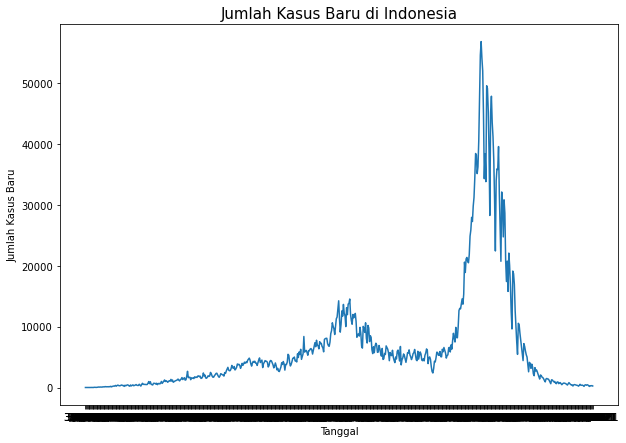

In [11]:
#Zooming trend kasus kematian Covid di Indonesia sampai DES 2021
plt.figure(figsize=(10,7))
plt.plot(indo['Date'].values,indo['New Cases'].values)
plt.title('Jumlah Kasus Baru di Indonesia', fontsize=15)
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus Baru')
plt.show()

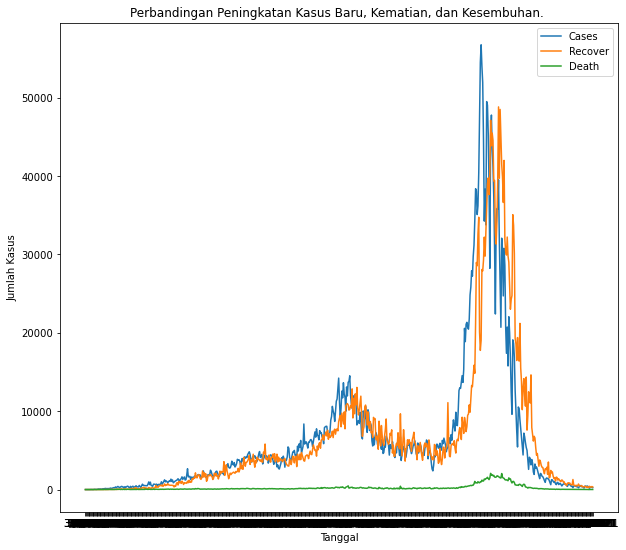

In [12]:
# Perbandingan Peningkatan Kasus Baru, Kematian, dan Kesembuhan
plt.figure(figsize=(10,9))
plt.plot(indo['Date'].values ,indo['New Cases'].values, label='Cases')
plt.plot(indo['Date'].values, indo['New Recovered'].values, label = 'Recover')
plt.plot(indo['Date'].values, indo['New Deaths'].values, label = 'Death')
plt.title('Perbandingan Peningkatan Kasus Baru, Kematian, dan Kesembuhan. ')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.show()

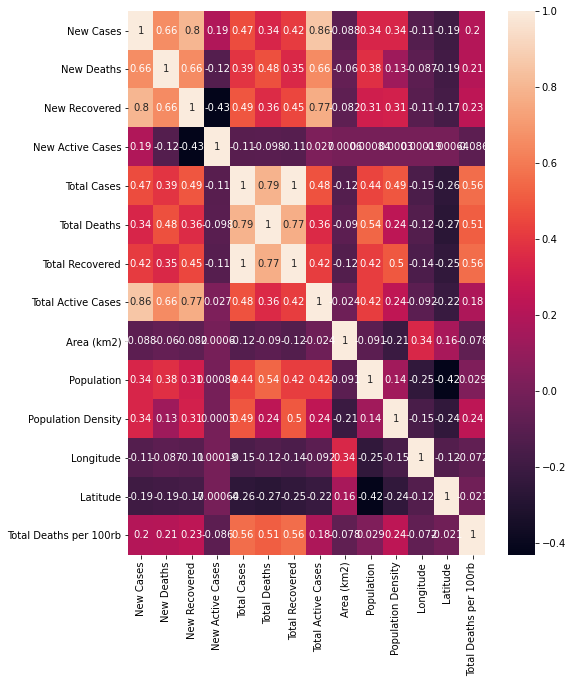

In [13]:
#Melihat korelasi antar variabel dalam suatu heatmap
plt.figure(figsize=(8,10))
sns.heatmap(data1.corr(), annot=True)
plt.show()

In [14]:
# Ekskalasi lokasi dengan menggunakan location Negara 'Indonesia' sebagai acuan data
id_data = data[data['Location'] == 'Indonesia']
id_data.drop(['Date', 'Location', 'Longitude', 'Latitude','Location Level'], axis=1, inplace=True)
id_data

D:\Application\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Area (km2),Population,Population Density,Total Deaths per 100rb
2,2,0,0,2,2,0,0,2,1916907,265185520,138.34,0.00
5,0,0,0,0,2,0,0,2,1916907,265185520,138.34,0.00
9,0,0,0,0,2,0,0,2,1916907,265185520,138.34,0.00
13,0,0,0,0,2,0,0,2,1916907,265185520,138.34,0.00
18,2,0,0,2,4,0,0,4,1916907,265185520,138.34,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
21637,176,11,419,-254,4256112,143819,4104333,7960,1916907,265185520,138.34,54.23
21670,297,11,324,-38,4256409,143830,4104657,7922,1916907,265185520,138.34,54.24
21703,278,10,307,-39,4256687,143840,4104964,7883,1916907,265185520,138.34,54.24
21735,311,10,388,-87,4256998,143850,4105352,7796,1916907,265185520,138.34,54.25


In [15]:
# SPLIT DATA
X = id_data.drop('New Deaths', axis=1)
y = id_data['New Deaths']

In [16]:
#Train_test_split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(481, 11)
(161, 11)
(481,)
(161,)


In [17]:
#Scalling the Data, supaya nominal angka data bisa seragam (tidak terlalu besar Range-nya)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [23]:
# PREDICT DATA, MODELLING & PERFORMANCE EVALUATION 
    
def predict_model(model, trainX, testX, trainY, testY):
    m = model
    m.fit(trainX, trainY)
    predict_m = m.predict(testX)
    print('-----------{}-----------'.format(model))
    print_evaluate(testY, predict_m)
    
def print_evaluate(true, predicted):  
    mape = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    print('R2 Square', r2_square)
    print('__________________________________')

In [24]:
#HASIL PERFORMANCE EVALUATION 
model = [LinearRegression()]
for i in model:
    predict_model(i, X_train,X_test, y_train, y_test)

-----------LinearRegression()-----------
MSE: 8.82443225499716e-24
RMSE: 2.970594596204127e-12
MAPE: 2.234899635955992e-12
R2 Square 1.0
__________________________________


MSE: 8.82443225499716e-24
RMSE: 2.970594596204127e-12
MAPE: 2.234899635955992e-12
R2 Square 1.0
__________________________________


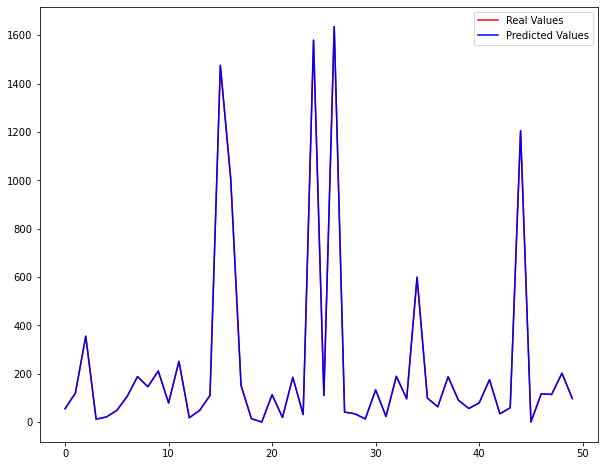

In [25]:
dct = LinearRegression()
dct.fit(X_train, y_train)

pred_dct = dct.predict(X_test)
print_evaluate(y_test, pred_dct)

df_dct = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred_dct})
df_dct.head()

plt.figure(figsize=(10,8))
plt.plot(df_dct['Real Values'].values[:50], label = 'Real Values', color='red')
plt.plot(df_dct['Predicted Values'].values[:50], label = 'Predicted Values', color='blue')
plt.legend()
plt.show()